## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot') 
from matplotlib.pyplot import figure
pd.options.mode.chained_assignment = None

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow import keras

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold


import warnings
warnings.filterwarnings("ignore", category=UserWarning)
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_validate
from sklearn import metrics

from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from methods import *

from sklearn.metrics import f1_score, accuracy_score, recall_score

%matplotlib inline 
matplotlib.rcParams['figure.figsize'] = (12,8)

## Importing the Framingham dataset

In [2]:
# read the data from the csv file
df = pd.read_csv('dataset.csv')

## Exploratory Data Analysis and Data Preprocessing

In [3]:
# quick look at the data
df.head()

,RANDID,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,...,CVD,HYPERTEN,TIMEAP,TIMEMI,TIMEMIFC,TIMECHD,TIMESTRK,TIMECVD,TIMEDTH,TIMEHYP
0,2448,1,195.0,39,106.0,70.0,0,0.0,26.97,0,...,1,0,8766,6438,6438,6438,8766,6438,8766,8766
1,2448,1,209.0,52,121.0,66.0,0,0.0,NaN,0,...,1,0,8766,6438,6438,6438,8766,6438,8766,8766
2,6238,2,250.0,46,121.0,81.0,0,0.0,28.73,0,...,0,0,8766,8766,8766,8766,8766,8766,8766,8766
3,6238,2,260.0,52,105.0,69.5,0,0.0,29.43,0,...,0,0,8766,8766,8766,8766,8766,8766,8766,8766
4,6238,2,237.0,58,108.0,66.0,0,0.0,28.50,0,...,0,0,8766,8766,8766,8766,8766,8766,8766,8766


In [4]:
# shape of the dataset
df.shape

(11627, 39)

In [5]:
df.info() # non null count and datatypes of the variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11627 entries, 0 to 11626
Data columns (total 39 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RANDID    11627 non-null  int64  
 1   SEX       11627 non-null  int64  
 2   TOTCHOL   11218 non-null  float64
 3   AGE       11627 non-null  int64  
 4   SYSBP     11627 non-null  float64
 5   DIABP     11627 non-null  float64
 6   CURSMOKE  11627 non-null  int64  
 7   CIGPDAY   11548 non-null  float64
 8   BMI       11575 non-null  float64
 9   DIABETES  11627 non-null  int64  
 10  BPMEDS    11034 non-null  float64
 11  HEARTRTE  11621 non-null  float64
 12  GLUCOSE   10187 non-null  float64
 13  educ      11332 non-null  float64
 14  PREVCHD   11627 non-null  int64  
 15  PREVAP    11627 non-null  int64  
 16  PREVMI    11627 non-null  int64  
 17  PREVSTRK  11627 non-null  int64  
 18  PREVHYP   11627 non-null  int64  
 19  TIME      11627 non-null  int64  
 20  PERIOD    11627 non-null  in

In [6]:
# drop irrelevant columns
cols_to_drop=['RANDID','educ','TIMECVD','TIME','PERIOD','HDLC','LDLC','ANGINA','HOSPMI', 'MI_FCHD', 'ANYCHD','STROKE','HYPERTEN', 'DEATH','TIMEAP','TIMEMI', 'TIMEMIFC','TIMECHD', 'TIMESTRK', 'TIMEHYP','TIMEDTH']
df=df.drop(cols_to_drop, axis=1) # axis=1 because we are dropping columns, not rows

In [7]:
# view the shape again
df.shape

(11627, 18)

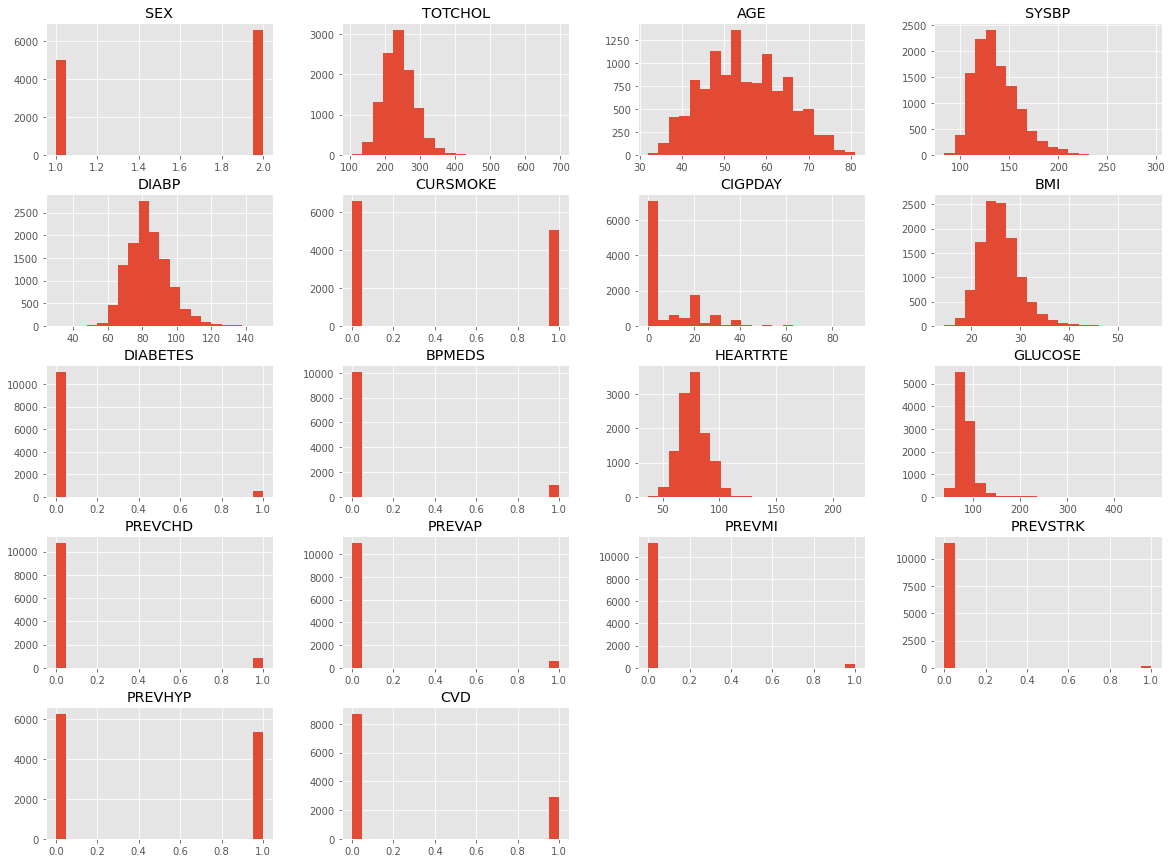

In [8]:
df.hist(bins=20, figsize=(20,15))
plt.show()

In [9]:
# have a better look at the class variable
df.CVD.value_counts()

0    8728
1    2899
Name: CVD, dtype: int64

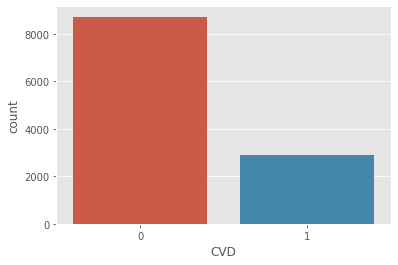

In [10]:
# visualise the class variable
sns.countplot(x='CVD',data=df)

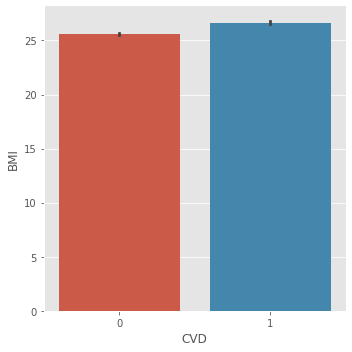

In [11]:
# check BMI of patients with/without heart disease (confidence interval)
sns.catplot(x='CVD',y='BMI',data=df, kind='bar')

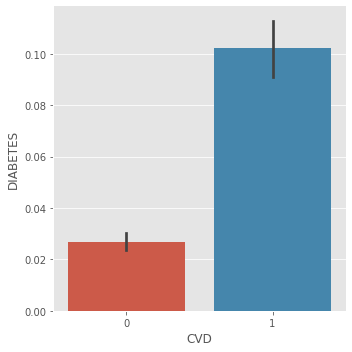

In [12]:
# check diabetes patients with/without heart disease
sns.catplot(x='CVD',y='DIABETES',kind='bar',data=df)

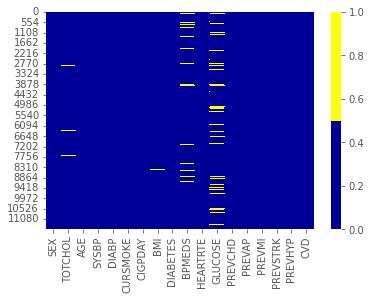

In [13]:
# check for missing values and plot a heatmap
colours = ['#000099', '#ffff00']
sns.heatmap(df.isnull(), cmap=sns.color_palette(colours))

In [14]:
df.isnull().sum().sum() # print number of rows with missing values

2579

In [15]:
print(df.isnull().sum()) # view number of missing values in each column

SEX            0
TOTCHOL      409
AGE            0
SYSBP          0
DIABP          0
CURSMOKE       0
CIGPDAY       79
BMI           52
DIABETES       0
BPMEDS       593
HEARTRTE       6
GLUCOSE     1440
PREVCHD        0
PREVAP         0
PREVMI         0
PREVSTRK       0
PREVHYP        0
CVD            0
dtype: int64


In [16]:
# not many so we can drop them all
df=df.dropna()# drop the observations that contain missing values
df.isnull().sum().sum() # print number of rows with missing values after dropping the rows

0

In [17]:
# check for duplicate values
df.duplicated().sum()

0

In [18]:
df.columns # view the names of the remaining columns

Index(['SEX', 'TOTCHOL', 'AGE', 'SYSBP', 'DIABP', 'CURSMOKE', 'CIGPDAY', 'BMI',
       'DIABETES', 'BPMEDS', 'HEARTRTE', 'GLUCOSE', 'PREVCHD', 'PREVAP',
       'PREVMI', 'PREVSTRK', 'PREVHYP', 'CVD'],
      dtype='object')

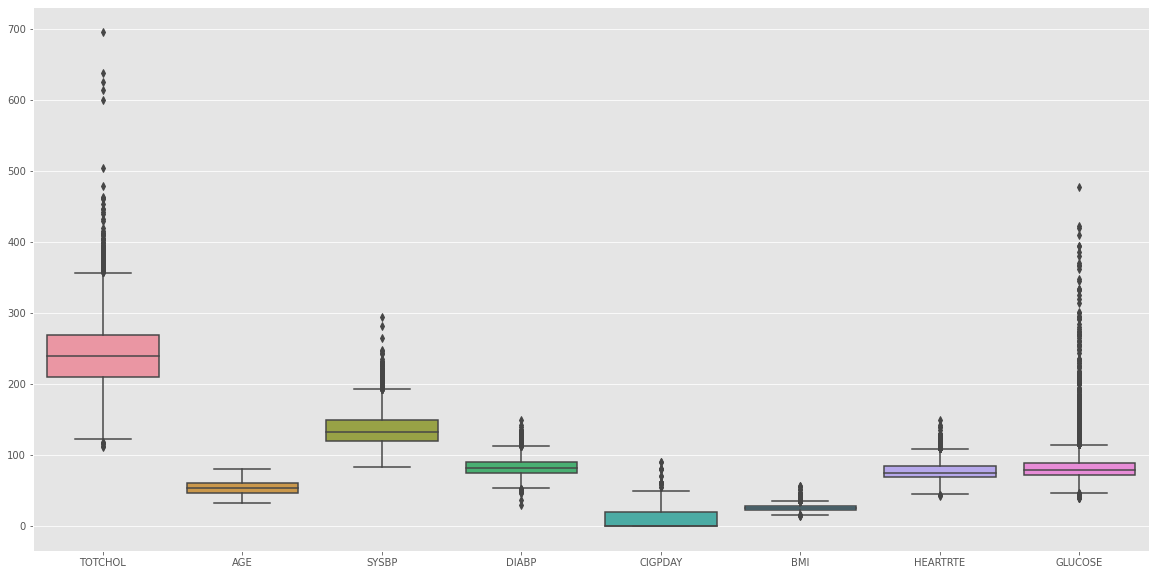

In [19]:
# visualise the outliers of the numerical columns
plt.figure(figsize=(20,10), facecolor='w')
sns.boxplot(data=df[['TOTCHOL', 'AGE', 'SYSBP', 'DIABP', 'CIGPDAY', 'BMI', 'HEARTRTE', 'GLUCOSE']])
plt.show()

In [20]:
# columns which need outlier treatment
dfIQR=df[['TOTCHOL', 'AGE', 'SYSBP', 'DIABP', 'CIGPDAY', 'BMI', 'HEARTRTE', 'GLUCOSE']]
dfIQR.describe()

,TOTCHOL,AGE,SYSBP,DIABP,CIGPDAY,BMI,HEARTRTE,GLUCOSE
count,9560.000000,9560.000000,9560.000000,9560.000000,9560.000000,9560.000000,9560.000000,9560.000000
mean,241.633473,54.299268,135.769979,82.930701,8.400314,25.835465,76.716004,83.756067
std,45.439304,9.474258,22.583883,11.715679,12.240943,4.038125,12.326825,25.032957
min,112.000000,32.000000,83.500000,30.000000,0.000000,14.430000,42.000000,39.000000
25%,210.000000,47.000000,120.000000,75.000000,0.000000,23.100000,69.000000,72.000000
50%,239.000000,54.000000,132.000000,82.000000,0.000000,25.450000,75.000000,79.000000
75%,269.000000,61.000000,149.000000,90.000000,20.000000,28.030000,85.000000,89.000000
max,696.000000,81.000000,295.000000,150.000000,90.000000,56.800000,150.000000,478.000000


In [21]:
Q1 = dfIQR.quantile(0.25) # calculate 1st quantile
Q3 = dfIQR.quantile(0.75) # calculate 3rd quantile
IQR = Q3-Q1 

In [22]:
# check for values that fall below the lower bound and above the upper bound 
df = df[~((df < (Q1-1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)] 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  


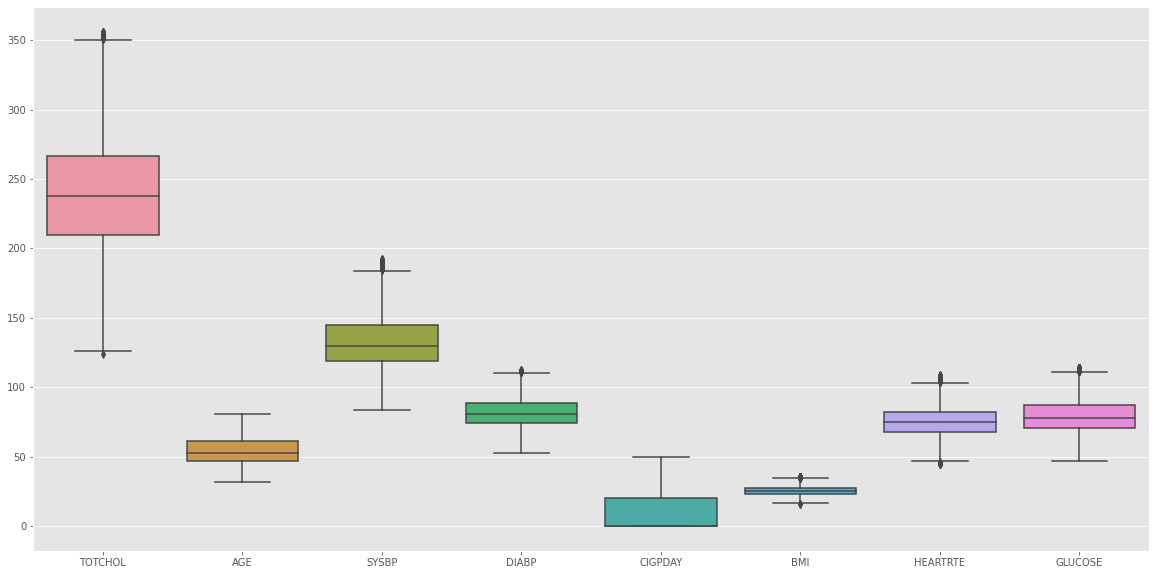

In [23]:
# visualise the outliers of the numerical columns again
plt.figure(figsize=(20,10), facecolor='w')
sns.boxplot(data=df[['TOTCHOL', 'AGE', 'SYSBP', 'DIABP', 'CIGPDAY', 'BMI', 'HEARTRTE', 'GLUCOSE']])
plt.show()

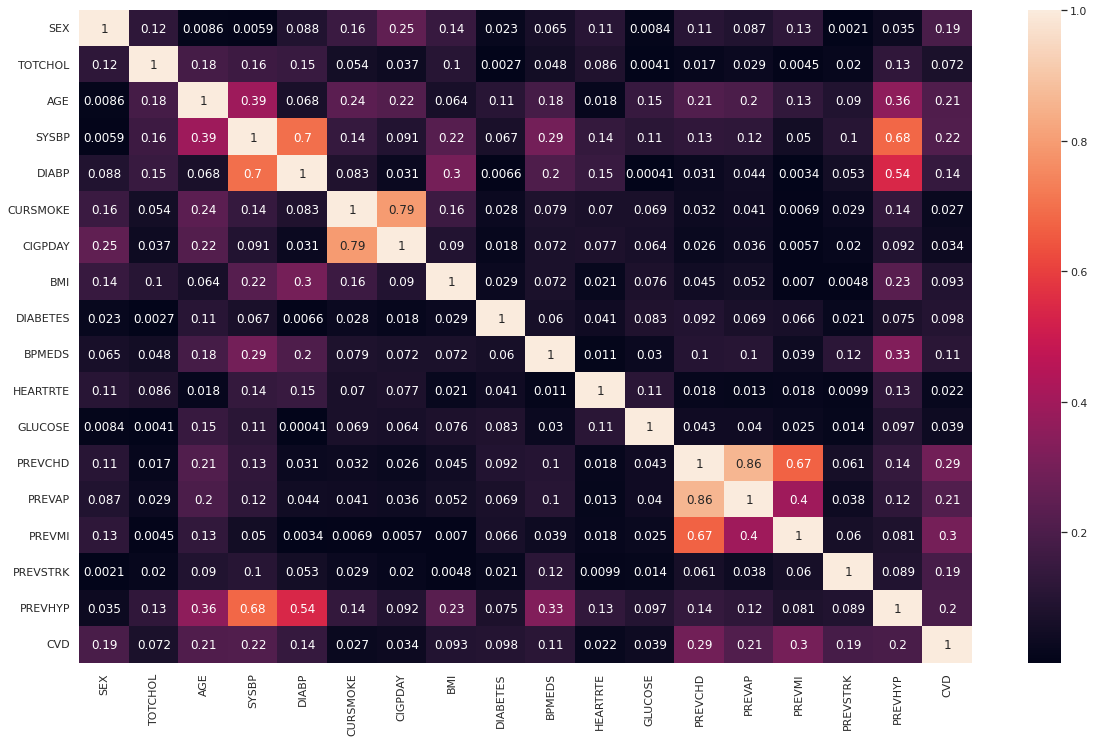

In [24]:
# correlation heatmap
sns.set(rc={'figure.figsize':(20,12)})
sns.heatmap(df.corr().abs(),annot=True)

# Feature Selection

In [25]:
# Identify the features with the most importance for the outcome variable Heart Disease

# separate independent & dependent variables
X = df.iloc[:,0:17]  # independent columns
y = df.iloc[:,-1]    # target column


# apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

# concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  # naming the dataframe columns
print(featureScores.nlargest(11,'Score'))  # print 10 best features

       Specs        Score
3      SYSBP  1106.735102
14    PREVMI   734.158949
12   PREVCHD   660.055570
2        AGE   617.476701
13    PREVAP   362.067542
1    TOTCHOL   310.177298
15  PREVSTRK   288.653465
4      DIABP   223.588197
16   PREVHYP   188.702376
6    CIGPDAY   164.474080
9     BPMEDS    95.286077


In [26]:
# drop the features we will not use, but in a separate dataframe
drop_columns=['CURSMOKE', 'BMI', 'HEARTRTE', 'GLUCOSE']
df=df.drop(drop_columns, axis=1) # axis=1 because we are dropping columns, not rows

In [27]:
# split the dataset
x = df.iloc[:, :-1] # independent variables
y = df.iloc[:, -1] # dependent variable

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .20, random_state = 0)

# Balance class variable using SMOTE and Random Undersampling

In [28]:
# view the % of each class
print('\nBalance of positive and negative classes (%):')
y_train.value_counts(normalize=True)*100


Balance of positive and negative classes (%):


0    77.123206
1    22.876794
Name: CVD, dtype: float64

In [29]:
# define pipeline
over = SMOTE(sampling_strategy=0.35)
under = RandomUnderSampler(sampling_strategy=0.95)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

In [30]:
x_train_res, y_train_res = pipeline.fit_resample(x_train, y_train) # fit the pipeline on the training set

In [31]:
# see the class % after resampling
print('\nBalance of positive and negative classes (%):')
y_train_res.value_counts(normalize=True)*100


Balance of positive and negative classes (%):


0    51.282051
1    48.717949
Name: CVD, dtype: float64

# Logistic Regression on imbalanced data

In [32]:
lr = LogisticRegression(solver='newton-cg')

Training time:  0.762061357498169
Testing time:  0.014541149139404297
              precision    recall  f1-score   support

           0       0.80      0.98      0.88      1283
           1       0.76      0.22      0.34       389

    accuracy                           0.80      1672
   macro avg       0.78      0.60      0.61      1672
weighted avg       0.80      0.80      0.76      1672

Recall: 0.2159383033419023


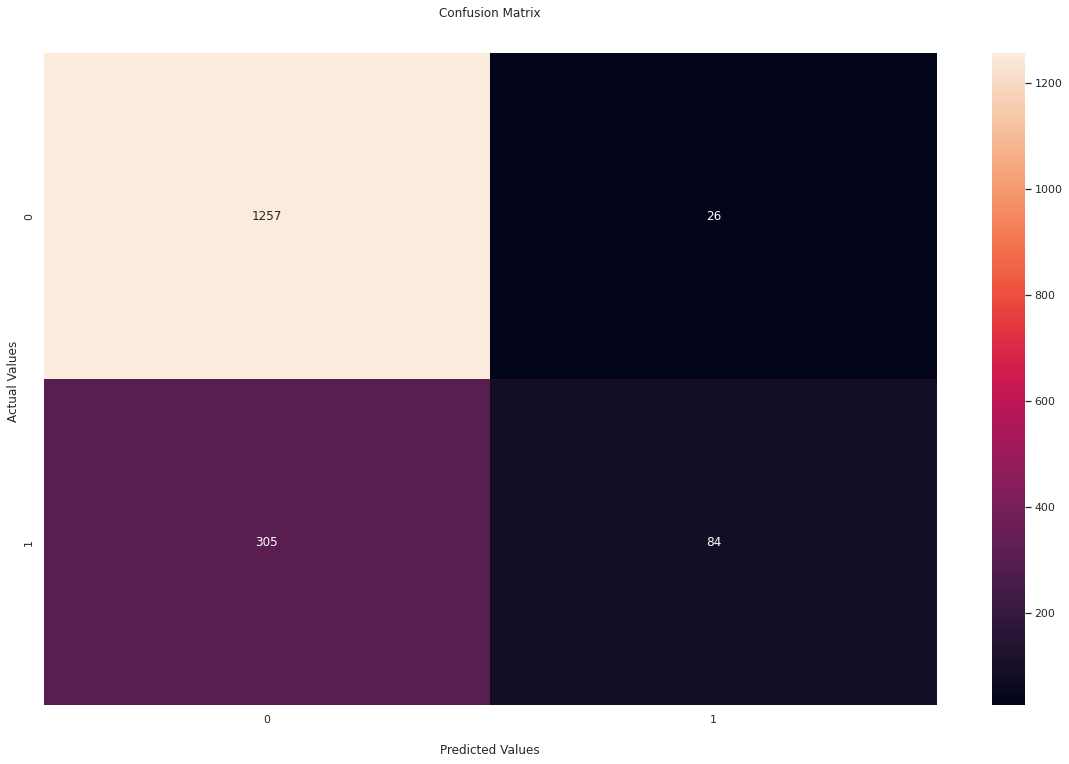

In [33]:
run_evaluate(lr, x_train, y_train, x_test, y_test)

# Logistic Regression on resampled data

Training time:  0.6071043014526367
Testing time:  0.02028512954711914
              precision    recall  f1-score   support

           0       0.87      0.73      0.79      1283
           1       0.41      0.63      0.50       389

    accuracy                           0.70      1672
   macro avg       0.64      0.68      0.64      1672
weighted avg       0.76      0.70      0.72      1672

Recall: 0.6323907455012854


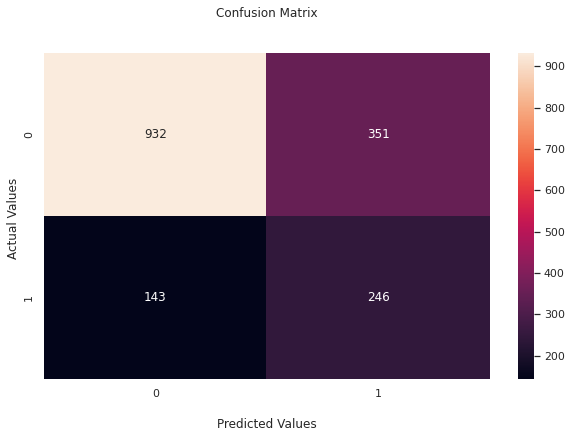

In [34]:
lr0=LogisticRegression(solver='newton-cg')
run_evaluate(lr0, x_train_res, y_train_res, x_test, y_test)

# Logistic Regression with cost function (balanced)

Training time:  1.0268363952636719
Testing time:  0.01260995864868164
              precision    recall  f1-score   support

           0       0.86      0.71      0.78      1283
           1       0.40      0.63      0.49       389

    accuracy                           0.69      1672
   macro avg       0.63      0.67      0.64      1672
weighted avg       0.76      0.69      0.71      1672

Recall: 0.6298200514138818


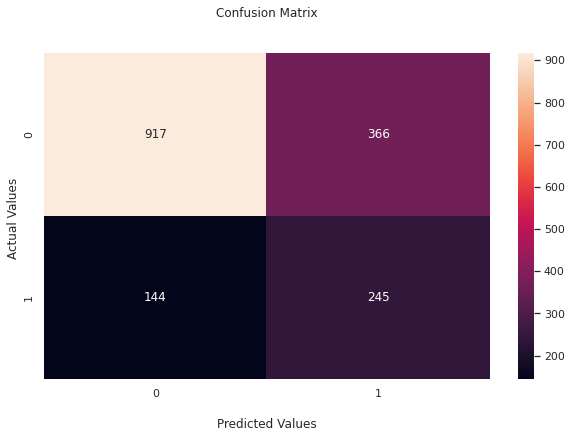

In [35]:
lr_balanced = LogisticRegression(solver='newton-cg', class_weight='balanced')
run_evaluate(lr_balanced, x_train, y_train, x_test, y_test)

# Logistic Regression with cost function (calculating weights)

In [36]:
# lr = LogisticRegression(solver='newton-cg')
# # Setting the range for class weights
# weights = np.linspace(0.0,0.99,200)
# # Creating a dictionary grid for grid search
# param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}

# # Fitting grid search to the train data with 5 folds
# gridsearch = GridSearchCV(estimator= lr, 
#                           param_grid= param_grid,
#                           cv=StratifiedKFold(), 
#                           n_jobs=-1, 
#                           scoring='f1', 
#                           verbose=2).fit(x_train, y_train)

# # Ploting the score for different values of weight
# sns.set_style('whitegrid')
# plt.figure(figsize=(12,8))
# weigh_data = pd.DataFrame({ 'score': gridsearch.cv_results_['mean_test_score'], 'weight': (1- weights)})
# sns.lineplot(weigh_data['weight'], weigh_data['score'])
# plt.xlabel('Weight for class 1')
# plt.ylabel('F1 score')
# plt.xticks([round(i/10,1) for i in range(0,11,1)])
# plt.title('Scoring for different class weights', fontsize=24)

In [37]:
# weigh_data.score.max() # output the highest score achieved

In [38]:
# weigh_data.query('score==0.5186643530267105')['weight'] # output the weight at that score

In [39]:
# weigh_data.loc[[51]] # confirm the above pair

The minority class is class 1. The majority class is class 0. Weight for class 1: 0.746281 Weight for class 0: 0.253719

Training time:  0.5823016166687012
Testing time:  0.013480186462402344
              precision    recall  f1-score   support

           0       0.86      0.76      0.81      1283
           1       0.42      0.58      0.49       389

    accuracy                           0.72      1672
   macro avg       0.64      0.67      0.65      1672
weighted avg       0.76      0.72      0.73      1672

Recall: 0.5809768637532133


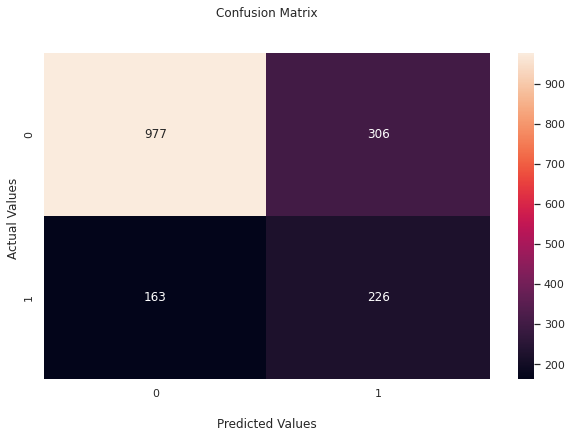

In [40]:
lr_weighted = LogisticRegression(solver='newton-cg', class_weight={0: 0.253719, 1: 0.746281})
run_evaluate(lr_weighted, x_train, y_train, x_test, y_test)

# Decision Tree on Imbalanced Data

Training time:  0.0562443733215332
Testing time:  0.003269195556640625
              precision    recall  f1-score   support

           0       0.81      0.82      0.82      1283
           1       0.39      0.38      0.38       389

    accuracy                           0.72      1672
   macro avg       0.60      0.60      0.60      1672
weighted avg       0.71      0.72      0.72      1672

Recall: 0.38046272493573263


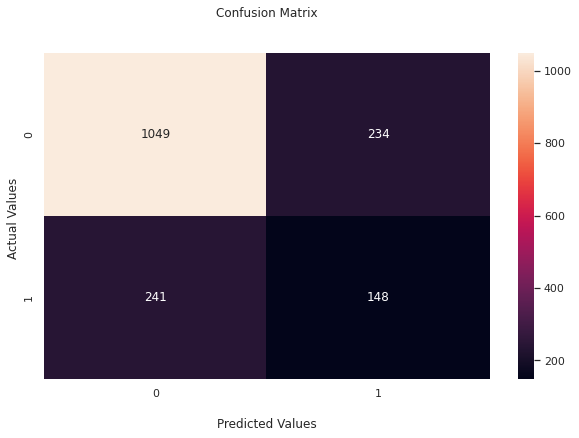

In [41]:
decision_tree= DecisionTreeClassifier(criterion= "gini",random_state=10)
run_evaluate(decision_tree, x_train, y_train, x_test, y_test)

# Decision Tree on Resampled Data

Training time:  0.05361342430114746
Testing time:  0.010303258895874023
              precision    recall  f1-score   support

           0       0.84      0.65      0.73      1283
           1       0.34      0.60      0.43       389

    accuracy                           0.64      1672
   macro avg       0.59      0.62      0.58      1672
weighted avg       0.72      0.64      0.66      1672

Recall: 0.596401028277635


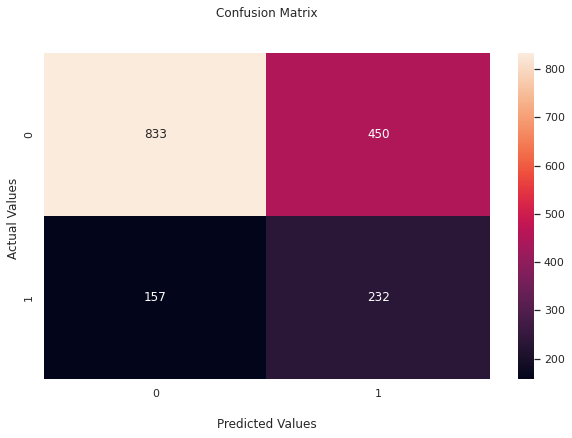

In [42]:
run_evaluate(decision_tree, x_train_res, y_train_res, x_test, y_test)

# Decision Tree with cost function

Training time:  0.09503936767578125
Testing time:  0.0031995773315429688
              precision    recall  f1-score   support

           0       0.81      0.84      0.82      1283
           1       0.39      0.34      0.36       389

    accuracy                           0.72      1672
   macro avg       0.60      0.59      0.59      1672
weighted avg       0.71      0.72      0.71      1672

Recall: 0.33676092544987146


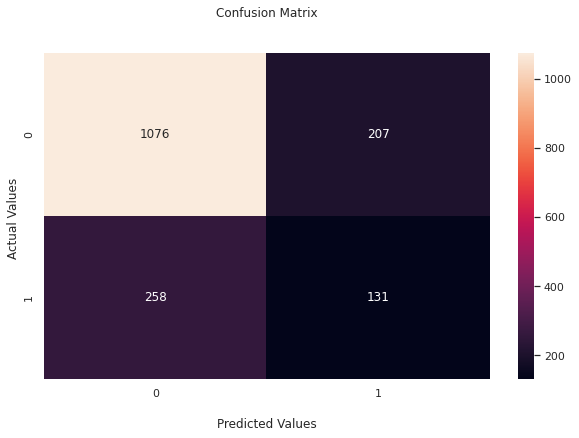

In [43]:
decision_tree_balanced= DecisionTreeClassifier(criterion= "gini",random_state=10, class_weight='balanced')
run_evaluate(decision_tree_balanced, x_train, y_train, x_test, y_test)

# KNN (K Nearest Neighbors) on imbalanced data

Minimum error:- 0.23026315789473684 at K = 25


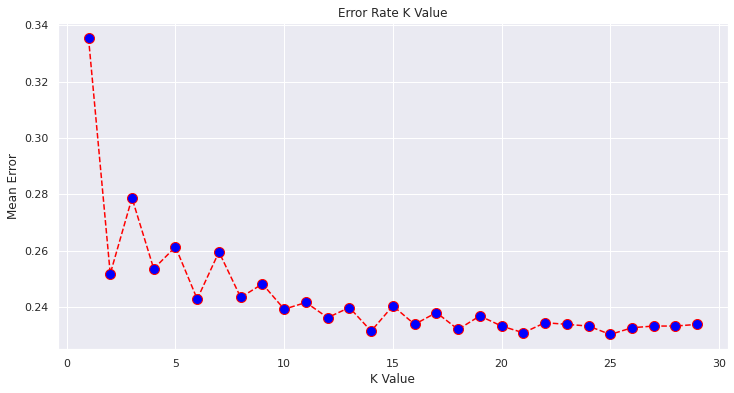

In [44]:
find_best_k(x_train, y_train, x_test, y_test)

Training time:  0.01704263687133789
Testing time:  0.11969375610351562
              precision    recall  f1-score   support

           0       0.78      0.99      0.87      1283
           1       0.55      0.06      0.10       389

    accuracy                           0.77      1672
   macro avg       0.66      0.52      0.49      1672
weighted avg       0.72      0.77      0.69      1672

Recall: 0.056555269922879174


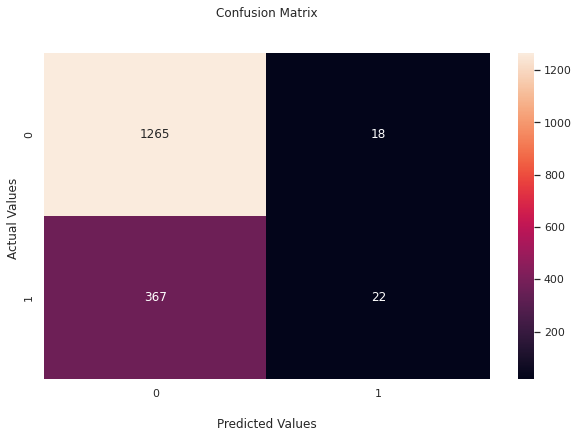

In [45]:
knn= KNeighborsClassifier(n_neighbors=25)  
run_evaluate(knn, x_train, y_train, x_test, y_test)

# KNN (K Nearest Neighbors) on resampled data

Minimum error:- 0.32177033492822965 at K = 2


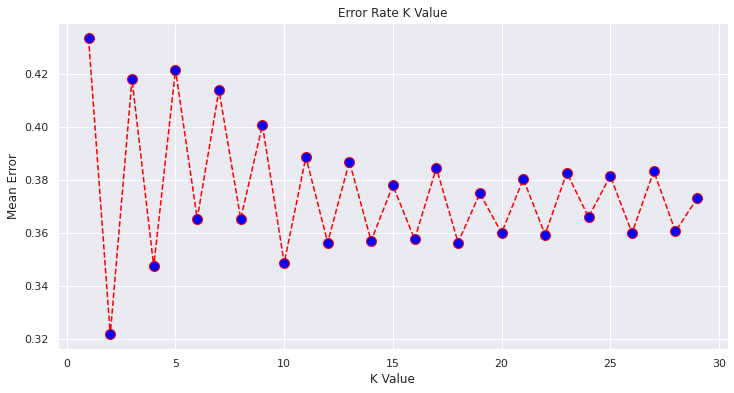

In [46]:
find_best_k(x_train_res, y_train_res, x_test, y_test)

Training time:  0.009711265563964844
Testing time:  0.063446044921875
              precision    recall  f1-score   support

           0       0.79      0.79      0.79      1283
           1       0.31      0.31      0.31       389

    accuracy                           0.68      1672
   macro avg       0.55      0.55      0.55      1672
weighted avg       0.68      0.68      0.68      1672

Recall: 0.3110539845758355


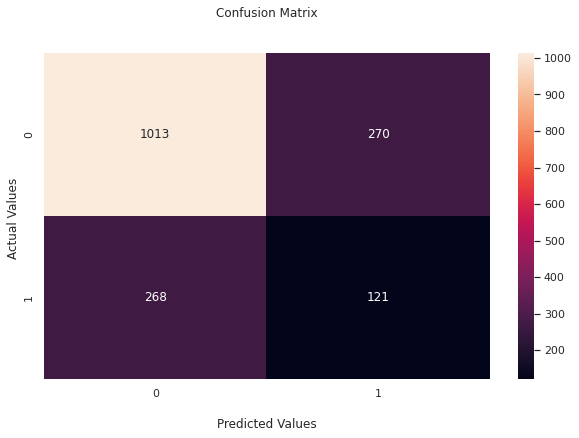

In [47]:
knn_res= KNeighborsClassifier(n_neighbors=2)  
run_evaluate(knn_res, x_train_res, y_train_res, x_test, y_test)

# Random Forest with GridSearchCV on imbalanced data

In [48]:
# rfc=RandomForestClassifier(random_state=42)
# # load contents from config file that contains the parameters
# file="rfc_params.config"
# contents=open(file).read()
# param_grid=eval(contents)
# CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
# CV_rfc.fit(x_train, y_train)

In [49]:
# CV_rfc.best_params_ # view the parameters found from grid search cv

Training time:  0.7316370010375977
Testing time:  0.04787182807922363
              precision    recall  f1-score   support

           0       0.80      0.99      0.89      1283
           1       0.89      0.18      0.30       389

    accuracy                           0.80      1672
   macro avg       0.84      0.59      0.59      1672
weighted avg       0.82      0.80      0.75      1672

Recall: 0.18251928020565553


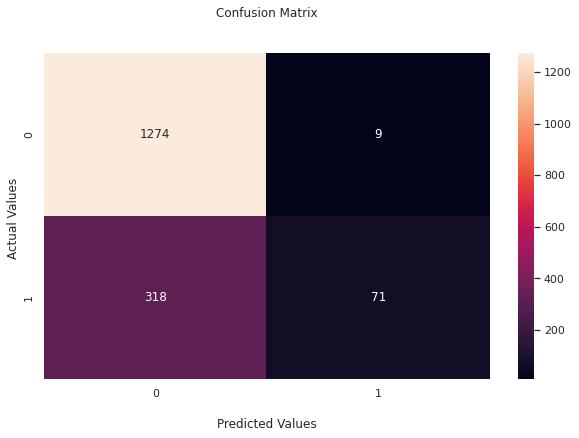

In [50]:
rfc0=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 200, max_depth=6, criterion='gini')
run_evaluate(rfc0, x_train, y_train, x_test, y_test)

# Random Forest with GridSearchCV on oversampled data

In [51]:
# CV_rfc.fit(x_train_res, y_train_res)
# CV_rfc.best_params_

Training time:  0.6306717395782471
Testing time:  0.05940985679626465
              precision    recall  f1-score   support

           0       0.86      0.74      0.79      1283
           1       0.41      0.60      0.49       389

    accuracy                           0.71      1672
   macro avg       0.64      0.67      0.64      1672
weighted avg       0.76      0.71      0.72      1672

Recall: 0.6041131105398457


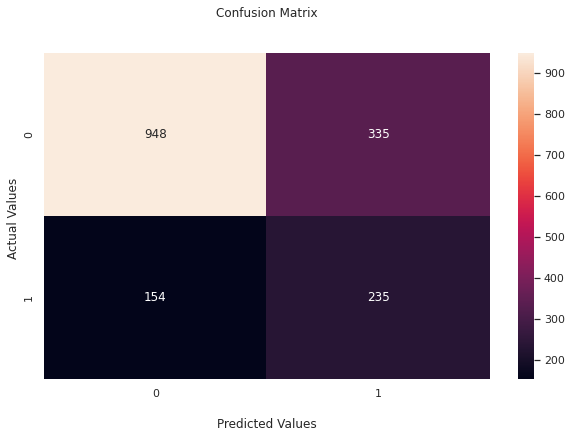

In [52]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 200, max_depth=8, criterion='gini')
run_evaluate(rfc1, x_train_res, y_train_res, x_test, y_test)

# Random Forest with Bootstrap Class Weighting

Training time:  1.0300402641296387
Testing time:  0.04921436309814453
              precision    recall  f1-score   support

           0       0.86      0.74      0.80      1283
           1       0.42      0.61      0.50       389

    accuracy                           0.71      1672
   macro avg       0.64      0.68      0.65      1672
weighted avg       0.76      0.71      0.73      1672

Recall: 0.6143958868894601


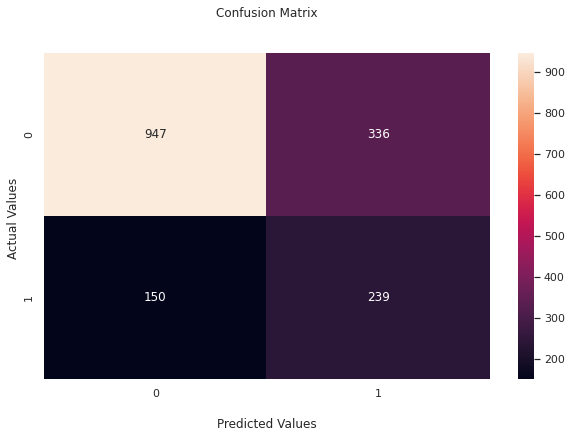

In [53]:
rfc2=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 200, max_depth=6, criterion='gini',class_weight='balanced_subsample')
run_evaluate(rfc2, x_train, y_train, x_test, y_test)

# XGBoost on Imbalanced Data

Training time:  0.43518590927124023
Testing time:  0.006246328353881836
              precision    recall  f1-score   support

           0       0.80      0.99      0.89      1283
           1       0.82      0.20      0.32       389

    accuracy                           0.80      1672
   macro avg       0.81      0.59      0.60      1672
weighted avg       0.81      0.80      0.75      1672

Recall: 0.20051413881748073


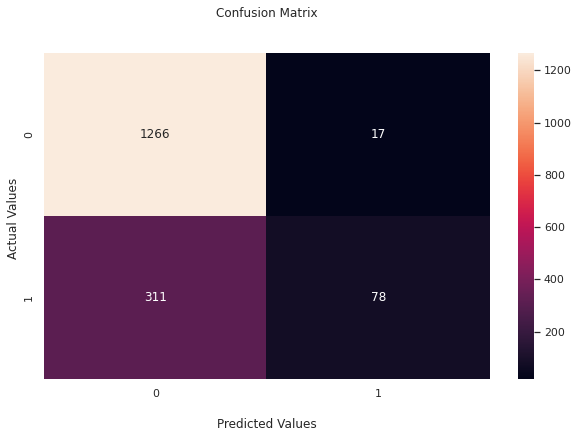

In [54]:
xgb = XGBClassifier()
run_evaluate(xgb, x_train, y_train, x_test, y_test)

# XGBoost on resampled data

Training time:  0.20728564262390137
Testing time:  0.008292198181152344
              precision    recall  f1-score   support

           0       0.86      0.72      0.78      1283
           1       0.40      0.61      0.48       389

    accuracy                           0.69      1672
   macro avg       0.63      0.66      0.63      1672
weighted avg       0.75      0.69      0.71      1672

Recall: 0.6143958868894601


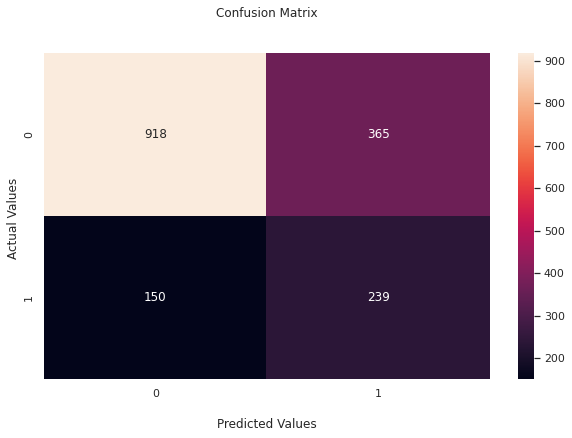

In [55]:
xgb0 = XGBClassifier()
run_evaluate(xgb0, x_train_res, y_train_res, x_test, y_test)

# XGBoost with Bayesian Optimization on resampled data

In [56]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
# initialize domain space
space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 0
    }

In [57]:
# define objective function
def objective(space):
    clf=XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( x_train_res, y_train_res), (x_test, y_test)]
    
    clf.fit(x_train, y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test, pred>0.5)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [58]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

SCORE:
0.7673444976076556
SCORE:
0.7799043062200957
SCORE:
0.7888755980861244
SCORE:
0.7673444976076556
SCORE:
0.7673444976076556
SCORE:
0.7673444976076556
SCORE:
0.7822966507177034
SCORE:
0.777511961722488
SCORE:
0.7673444976076556
SCORE:
0.7769138755980861
SCORE:
0.7673444976076556
SCORE:
0.7739234449760766
SCORE:
0.7673444976076556
SCORE:
0.7673444976076556
SCORE:
0.7673444976076556
SCORE:
0.7673444976076556
SCORE:
0.7673444976076556
SCORE:
0.7673444976076556
SCORE:
0.7751196172248804
SCORE:
0.7673444976076556
SCORE:
0.7870813397129187
SCORE:
0.7864832535885168
SCORE:
0.7870813397129187
SCORE:
0.7822966507177034
SCORE:
0.7679425837320574
SCORE:
0.7864832535885168
SCORE:
0.7811004784688995
SCORE:
0.7697368421052632
SCORE:
0.7673444976076556
SCORE:
0.7799043062200957
SCORE:
0.7673444976076556
SCORE:
0.7864832535885168
SCORE:
0.77811004784689
SCORE:
0.7685406698564593
SCORE:
0.7888755980861244
SCORE:
0.7673444976076556
SCORE:
0.7828947368421053
SCORE:
0.777511961722488
SCORE:
0.7673444

In [59]:
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

The best hyperparameters are :  

{'colsample_bytree': 0.7824356095951548, 'gamma': 7.2538763577426195, 'max_depth': 10.0, 'min_child_weight': 2.0, 'reg_alpha': 47.0, 'reg_lambda': 0.5198557167647114}


Training time:  0.3405609130859375
Testing time:  0.003363370895385742
              precision    recall  f1-score   support

           0       0.87      0.70      0.78      1283
           1       0.40      0.65      0.49       389

    accuracy                           0.69      1672
   macro avg       0.63      0.68      0.64      1672
weighted avg       0.76      0.69      0.71      1672

Recall: 0.6478149100257069


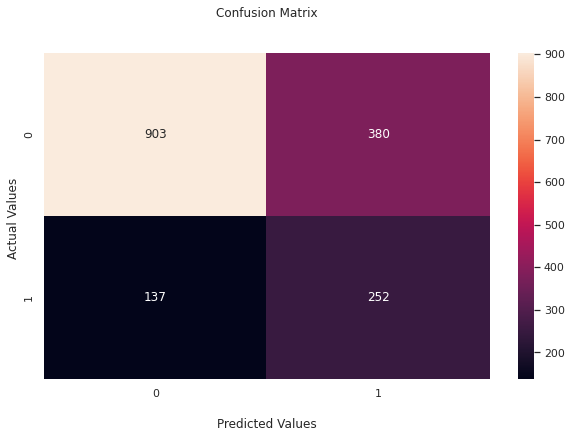

In [60]:
xgb = XGBClassifier(colsample_bytree=0.860788930830425, gamma=4.166609435498096, max_depth=9, min_child_weight=6.0
                    ,reg_alpha=41.0, reg_lambda=0.8938137137794726)
run_evaluate(xgb, x_train_res, y_train_res, x_test, y_test)


# Ensemble: Hard and Soft Voting

In [61]:
from sklearn.ensemble import VotingClassifier

In [62]:
# Making a HardVote classifier
votingclf = VotingClassifier(
    estimators=[('lr', lr_weighted), ('rf', rfc0), ('xgb', xgb0)],
    voting='hard')

Training time:  1.0550775527954102
Testing time:  0.10625267028808594
              precision    recall  f1-score   support

           0       0.86      0.69      0.77      1283
           1       0.39      0.64      0.48       389

    accuracy                           0.68      1672
   macro avg       0.62      0.67      0.62      1672
weighted avg       0.75      0.68      0.70      1672

Recall: 0.6375321336760925


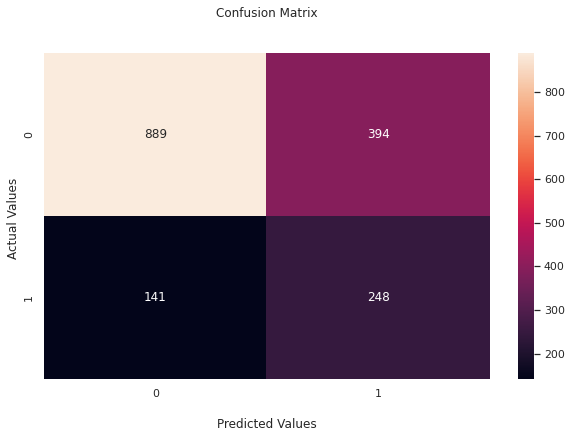

In [63]:
run_evaluate(votingclf, x_train_res, y_train_res, x_test, y_test)

In [64]:
# Making a SoftVote classifier
votingclf1 = VotingClassifier(
    estimators=[('lr', lr_weighted), ('rf', rfc0), ('xgb', xgb0)],
    voting='soft')

Training time:  1.059572458267212
Testing time:  0.08518719673156738
              precision    recall  f1-score   support

           0       0.89      0.57      0.69      1283
           1       0.35      0.76      0.48       389

    accuracy                           0.61      1672
   macro avg       0.62      0.66      0.58      1672
weighted avg       0.76      0.61      0.64      1672

Recall: 0.7583547557840618


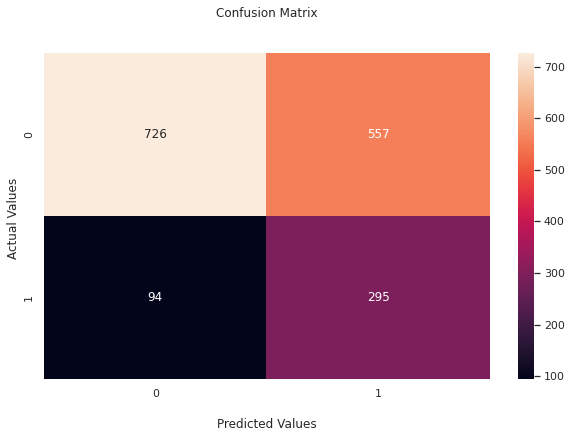

In [65]:
run_evaluate(votingclf1, x_train_res, y_train_res, x_test, y_test)

# Artificial Neural Network

In [66]:
df.shape

(8360, 14)

In [67]:
# insert the layers of the network
model = Sequential([Dense(units=2,input_shape=(13,),activation='relu'),
                    Dense(units=5,activation='relu'),
                    keras.layers.Dropout(0.5),
                    Dense(units=10,activation='relu'),
                    keras.layers.Dropout(0.5),
                    Dense(units=2,activation='sigmoid')])

In [68]:
# compile the model
model.compile(optimizer=Adam(learning_rate=0.01),loss='sparse_categorical_crossentropy',metrics=['accuracy', 'mse'])

In [69]:
# # fit the model on the data
# train_start = time.time() # ann model training starts
# model.fit(
#       x=x_train_res
#     , y=y_train_res
#     , batch_size=20
#     , epochs=1000
#     , shuffle=True
#     , verbose=0
# )
# train_stop = time.time() # model training stops
# print("Training time: ", train_stop - train_start) # print training time

In [70]:
# test_start=time.time() # testing starts
# predictions = model.predict(
#       x=x_test
#     , batch_size=20
#     , verbose=0
# )
# test_stop=time.time() # testing stops
# print("Testing time: ", test_stop - test_start) # print testing time
# rounded_predictions = np.argmax(predictions, axis=-1) # round the predictions

In [71]:
# cm = confusion_matrix(y_test, rounded_predictions)
# ax = sns.heatmap(cm, annot=True, fmt = "g")
# # plot the confusion matrix
# ax.set_title('Confusion Matrix\n\n');
# ax.set_xlabel('\nPredicted Values')
# ax.set_ylabel('Actual Values ');
# # Display the visualization of the Confusion Matrix.
# plt.rcParams["figure.figsize"] = (10,6)
# plt.show()
    
# print(classification_report(y_test, rounded_predictions)) # print classification report
# print("Recall:", recall_score(y_test, rounded_predictions))

# Cross Validation to check model stability
Models to be tested: Logistic Regression, Tuned Random Forest, XGBoost, Ensemble: Hard Voting

In [72]:
scores_logreg=cross_validate(lr0,x_train_res, y_train_res) # cross validate logistic regression model

Cross Validation Scores:

Mean score:  0.6834008097165991
Standard deviation:  0.0057000572420898305


In [73]:
scores_rf=cross_validate(rfc1,x_train_res, y_train_res) # cross validate random forest model

Cross Validation Scores:

Mean score:  0.684480431848853
Standard deviation:  0.008594700851870774


In [74]:
scores_xgb=cross_validate(xgb0,x_train_res, y_train_res) # cross validate xgboost model

Cross Validation Scores:

Mean score:  0.6890688259109312
Standard deviation:  0.011596518790251462


In [75]:
scores_ens=cross_validate(votingclf,x_train_res, y_train_res) # cross validate ensemble model

Cross Validation Scores:

Mean score:  0.6904183535762484
Standard deviation:  0.012028221298330454


([<matplotlib.axis.XTick at 0x7fb5d9629a50>,
 [Text(0, 0, 'Logistic Regression'),
  Text(0, 0, 'Random Forest'),
  Text(0, 0, 'XGBoost'),
  Text(0, 0, 'Hard Voting')])

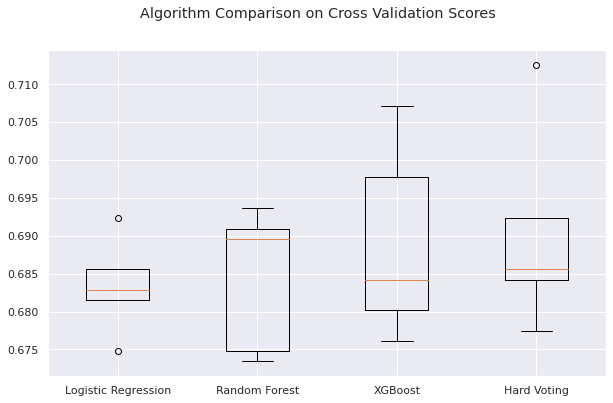

In [76]:
# plot results in boxplot
results=[] # new empty list
results.append(scores_logreg) # add log reg scores to list
results.append(scores_rf) # add random forest scores to list
results.append(scores_xgb) # add xgboost scores to list
results.append(scores_ens) # add ensemble scores to list
fig = plt.figure()
fig.suptitle('Algorithm Comparison on Cross Validation Scores')
plt.boxplot(results)
plt.xticks([1, 2, 3, 4], ['Logistic Regression', 'Random Forest', 'XGBoost','Hard Voting']) # set the labels

In [77]:
print("Logistic Regression Scores: ", scores_logreg)

Logistic Regression Scores:  [0.69230769 0.68151147 0.67476383 0.682861   0.68556005]


In [78]:
print("Random forest scores: ", scores_rf)

Random forest scores:  [0.69095816 0.6734143  0.67476383 0.68960864 0.69365722]


# ROC-AUC

No Skill: ROC AUC=0.500
Model: ROC AUC=0.742


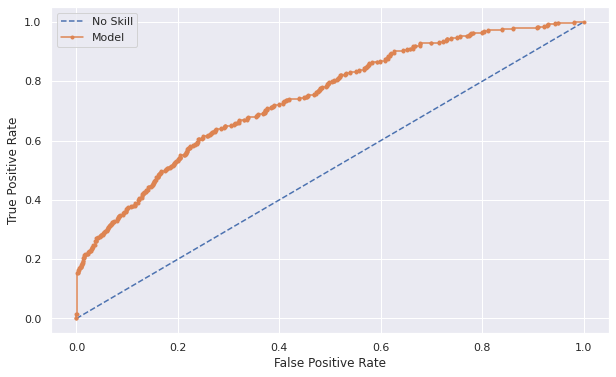

In [79]:
# plot the roc-auc for logistic regression
ROC_AUC(lr0, y_test, x_test)

No Skill: ROC AUC=0.500
Model: ROC AUC=0.743


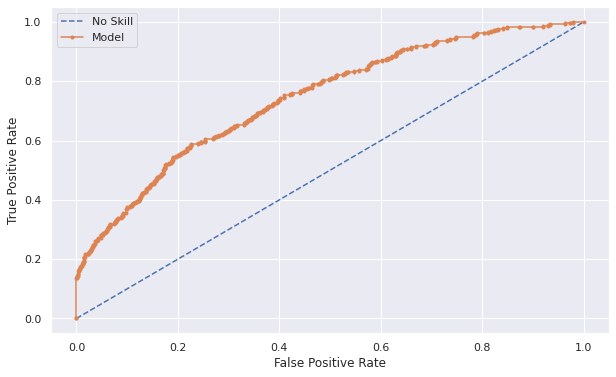

In [80]:
# plot the roc-auc for random forest
ROC_AUC(rfc1, y_test, x_test)

In [84]:
# Export model
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(lr0, file)

In [83]:
lr0.classes_

array([0, 1])